15

C     -1.732029    0.936380   -0.263792
C     -1.245611   -0.344691    0.391086
C     -0.148074   -0.937125   -0.457221
C      1.027643   -0.046934   -0.629060
C      1.844380    0.452547    0.446822
O      2.258388   -0.751434   -0.176074
H     -1.067690    1.750219    0.141672
H     -2.755656    1.196351    0.079326
H     -2.067563   -1.085155    0.476452
H     -0.915304   -0.131051    1.435284
H      0.059518   -1.940253   -0.041359
H     -0.607629   -1.129605   -1.454078
H      1.256952    0.317801   -1.671129
H      2.555070    1.272745    0.223946
H      1.537606    0.440206    1.498126



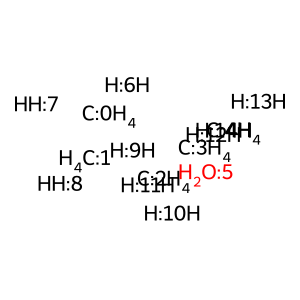

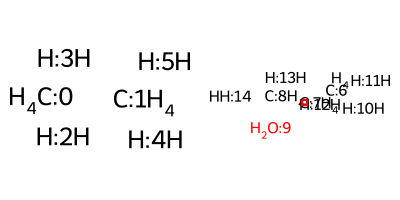

Reactant with atoms mapped onto product:
No mapping...
None


In [ ]:
from protomol import rd
import re
import pandas as pd
import sqlite3
from pathlib import Path
from rdkit import Chem


db = Path.home() / "C5O-Kinetics/db/data.db"
conn = sqlite3.connect(db)

df_smiles = pd.read_sql_query("SELECT smiles_text, initial FROM smiles", conn)

reactant = df_smiles[df_smiles["smiles_text"] == "[CH2]CCC1CO1"].iloc[0, 1]
prod1 = df_smiles[df_smiles["smiles_text"] == "C=C"].iloc[0, 1]
prod2 = df_smiles[df_smiles["smiles_text"] == "[CH2]C1CO1"].iloc[0, 1]

print(reactant)

VAL_DCT = {
    ("C", "C"): ("Cv3,Cv4", "Cv4,Cv3"),
    ("O", "C"): ("Ov1,Cv4", "Ov2,Cv3"),
    ("C", "O"): ("Cv3,Ov2", "Cv4,Ov1"),
}

rxn_smiles = "[CH2]C~CC1CO1"

radical = re.findall(r'\[([^\]]+)\]', rxn_smiles)[0]
alpha, beta = rxn_smiles.split("~")
A_, Ar = VAL_DCT[radical[0], beta[0]]


class ReactionSmarts:
    """SMARTS reaction templates for enumeration."""

    cleavage = f"[{A_}:1][{alpha[-1]}:3][{Ar}:2]>>[{Ar}:1]=[{alpha[-1]}:3].[{A_}:2]"

reactant = Chem.MolFromXYZBlock(reactant)

products = [prod1, prod2]

smarts = ReactionSmarts.cleavage

display(rd.mol.image(reactant, label=True))
display(rd.mols.image(products, label=True))

print("Reactant with atoms mapped onto product:")
mapping = rd.mols.reaction_mapping(reactants, products, smarts=smarts)
if mapping is None:
    print("No mapping...")
else:
    display(rd.mols.image(reactants, mapping=mapping))

print(mapping)




